## Questions
1. How has the overall sales performance changed over time?
2. What is the total order quantity over time?
3. Which age group contributes the most to sales, and how does their distribution look like?
4. What are the most popular bike colors among customers?
5. Is there a correlation between the profit and the cost of the bikes?
6. Which bike models are the top sellers?
7. Which country makes the most profit?
8. How does revenue vary across different countries?
9. What is the average order quantity by age group?
10. Is there a gender-based difference in purchasing behavior?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading database
data = pd.read_csv("uncleaned bike sales data.csv")
data

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,12/1/2021,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
1,261695,12/1/2021,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
2,261697,12/2/2021,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,$420.00,$769.00,$698.00,$840.00,"$1,538.00"
3,261698,12/2/2021,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,$420.00,$769.00,$349.00,$420.00,$769.00
4,261699,12/3/2021,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,$0.00,"$2,295.00","$2,086.00",$0.00,"$4,590.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,12/22/2021,22.0,December,2021,41,Adults (35-64),M,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
85,261779,12/23/2021,23.0,December,2021,30,Young Adults (25-34),F,United States,Oregon,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
86,261780,12/23/2021,23.0,December,2021,31,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"
87,261781,12/23/2021,23.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1.0,$295.00,$540.00,$245.00,$295.00,$540.00


In [3]:
#checking the shape of the dataset
data.shape

(89, 19)

In [4]:
#checking the number of null values in each column
data.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

The following columns each have one missing value:
1. Day
2. Age_Group
3. Product_Description
4. Order_Quantity

In [5]:
#brief info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        89 non-null     int64  
 1   Date                 89 non-null     object 
 2   Day                  88 non-null     float64
 3   Month                89 non-null     object 
 4   Year                 89 non-null     int64  
 5   Customer_Age         89 non-null     int64  
 6   Age_Group            88 non-null     object 
 7   Customer_Gender      89 non-null     object 
 8   Country              89 non-null     object 
 9   State                89 non-null     object 
 10  Product_Category     89 non-null     object 
 11  Sub_Category         89 non-null     object 
 12  Product_Description  88 non-null     object 
 13  Order_Quantity       88 non-null     float64
 14   Unit_Cost           89 non-null     object 
 15   Unit_Price          89 non-null     objec

In [6]:
#columns of the dataset
data.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

#### Sales_Order

In [7]:
data.rename(columns = {'Sales_Order #' : 'Sales_Order'}, inplace = True)

In [8]:
data.columns

Index(['Sales_Order', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [9]:
data['Sales_Order'].nunique()

87

#### Day

In [10]:
#replacing null value with mode and converting it to int16
data['Day'] = data['Day'].fillna(data['Day'].mode().iat[0])
data['Day'] = data['Day'].astype('int16')

#### Month

In [11]:
data['Month'].value_counts()

Month
December    88
Decmber      1
Name: count, dtype: int64

In [12]:
data['Month'] = data['Month'].str.strip().str.replace('Decmber','December')

In [13]:
data['Month'].value_counts()

Month
December    89
Name: count, dtype: int64

In [14]:
#converting Month into a category type
data['Month']= data['Month'].astype('category')

#### Year

In [15]:
data['Year'] = data['Year'].astype('int16')

#### Customer_Age

In [16]:
data['Customer_Age'] = data['Customer_Age'].astype('int16')

#### Age_Group

In [17]:
data['Age_Group'].value_counts()

Age_Group
Adults (35-64)          47
Young Adults (25-34)    31
Youth (<25)             10
Name: count, dtype: int64

In [18]:
data['Age_Group'] = data['Age_Group'].str.strip().str.split('(').str.get(0)

In [19]:
data['Age_Group'] = data['Age_Group'].astype('category')

#### Customer_Gender

In [20]:
data['Customer_Gender'] = data['Customer_Gender'].astype('category')

#### Country

In [21]:
data['Country'].value_counts()

Country
United States     30
Australia         27
United Kingdom     9
France             8
Germany            6
Canada             6
 United States     1
United  States     1
United States      1
Name: count, dtype: int64

In [22]:
data['Country'] = data['Country'].str.strip()
data['Country'] = data['Country'].str.replace('United  States', 'United States')

In [23]:
data['Country'] =data['Country'].astype('category')

In [24]:
data['Country'].value_counts()

Country
United States     33
Australia         27
United Kingdom     9
France             8
Canada             6
Germany            6
Name: count, dtype: int64

#### State

In [25]:
data['State'].value_counts()

State
California             20
New South Wales        14
Washington              9
England                 9
British Columbia        6
Victoria                6
Queensland              6
Oregon                  4
Seine (Paris)           4
Nordrhein-Westfalen     3
Hessen                  2
Hamburg                 1
Seine et Marne          1
Seine Saint Denis       1
Nord                    1
South Australia         1
Somme                   1
Name: count, dtype: int64

#### Product_Category

In [26]:
data['Product_Category']= data['Product_Category'].astype('category')

#### Sub_Category

In [27]:
data['Sub_Category'] = data['Sub_Category'].astype('category')

#### Product_Description

In [28]:
data['Product_Description']

0        Mountain-200 Black, 46
1       Mountain-200 Silver, 42
2     Mountain-400-W Silver, 46
3     Mountain-400-W Silver, 42
4        Mountain-200 Black, 46
                ...            
84      Mountain-200 Silver, 38
85      Mountain-200 Silver, 42
86       Mountain-200 Black, 42
87       Mountain-500 Black, 42
88       Mountain-200 Black, 42
Name: Product_Description, Length: 89, dtype: object

In [29]:
data['Product_Description'] = data['Product_Description'].str.strip()
data['Model_Name'] = data['Product_Description'].str.split(' ').str.get(0)
data['Bike_Color'] = data['Product_Description'].str.split(' ').str.get(1).str.replace(',','')
data['Unknown_Number'] = data['Product_Description'].str.split(' ').str.get(2)

In [30]:
data['Model_Name'].value_counts()

Model_Name
Mountain-200      62
Mountain-400-W    12
Mountain-500      10
Mountain-100       4
Name: count, dtype: int64

In [31]:
data['Bike_Color'].value_counts()

Bike_Color
Black     44
Silver    44
Name: count, dtype: int64

In [32]:
data[['Model_Name','Bike_Color','Unknown_Number']] = data[['Model_Name','Bike_Color','Unknown_Number']].astype('category')

#### Order_Quantity

In [33]:
data['Order_Quantity'] = data['Order_Quantity'].fillna(data['Order_Quantity'].mean())

In [34]:
data['Order_Quantity'] = data['Order_Quantity'].astype('int16')

#### Unit_Cost, Unit_Price, Profit, Cost and Revenue

In [35]:
# Changing column names: Removing leading/trailing spaces and adding ($) at the end
columns_to_change = [' Unit_Cost ', ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue']

for col in columns_to_change:
    new_col_name = col.strip() + '($)'
    data.rename(columns={col: new_col_name}, inplace=True)
    

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

In [37]:
#checking to see change reflected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order          89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  89 non-null     int16         
 3   Month                89 non-null     category      
 4   Year                 89 non-null     int16         
 5   Customer_Age         89 non-null     int16         
 6   Age_Group            88 non-null     category      
 7   Customer_Gender      89 non-null     category      
 8   Country              89 non-null     category      
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     category      
 11  Sub_Category         89 non-null     category      
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       89 non-null     

In [38]:
## Removing dollar sign, spaces, and converting values in selected columns to int
selected_columns = ['Unit_Cost($)', 'Unit_Price($)', 'Profit($)', 'Cost($)', 'Revenue($)']

for col in selected_columns:
    data[col] = pd.to_numeric(data[col].replace('[\$, ]', '', regex=True), errors='coerce').astype('Int64')

In [39]:
#checking to see change reflected
data

,Sales_Order,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,...,Product_Description,Order_Quantity,Unit_Cost($),Unit_Price($),Profit($),Cost($),Revenue($),Model_Name,Bike_Color,Unknown_Number
0,261695,2021-12-01,1,December,2021,39,Adults,F,United States,California,...,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180,Mountain-200,Black,46
1,261695,2021-12-01,1,December,2021,44,Adults,M,United Kingdom,England,...,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320,Mountain-200,Silver,42
2,261697,2021-12-02,2,December,2021,37,Adults,M,United States,California,...,"Mountain-400-W Silver, 46",2,420,769,698,840,1538,Mountain-400-W,Silver,46
3,261698,2021-12-02,2,December,2021,31,Young Adults,F,Australia,New South Wales,...,"Mountain-400-W Silver, 42",1,420,769,349,420,769,Mountain-400-W,Silver,42
4,261699,2021-12-03,3,December,2021,37,Adults,F,United States,California,...,"Mountain-200 Black, 46",2,0,2295,2086,0,4590,Mountain-200,Black,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,2021-12-22,22,December,2021,41,Adults,M,Germany,Hessen,...,"Mountain-200 Silver, 38",1,1266,2320,1054,1266,2320,Mountain-200,Silver,38
85,261779,2021-12-23,23,December,2021,30,Young Adults,F,United States,Oregon,...,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320,Mountain-200,Silver,42
86,261780,2021-12-23,23,December,2021,31,Young Adults,F,Canada,British Columbia,...,"Mountain-200 Black, 42",1,1252,2295,1043,1252,2295,Mountain-200,Black,42
87,261781,2021-12-23,23,December,2021,35,Adults,F,United States,California,...,"Mountain-500 Black, 42",1,295,540,245,295,540,Mountain-500,Black,42


In [40]:
# Saving to a csv
data.to_csv("anita.csv", index=False)

## Visualizations

### Sales Performance Over Time

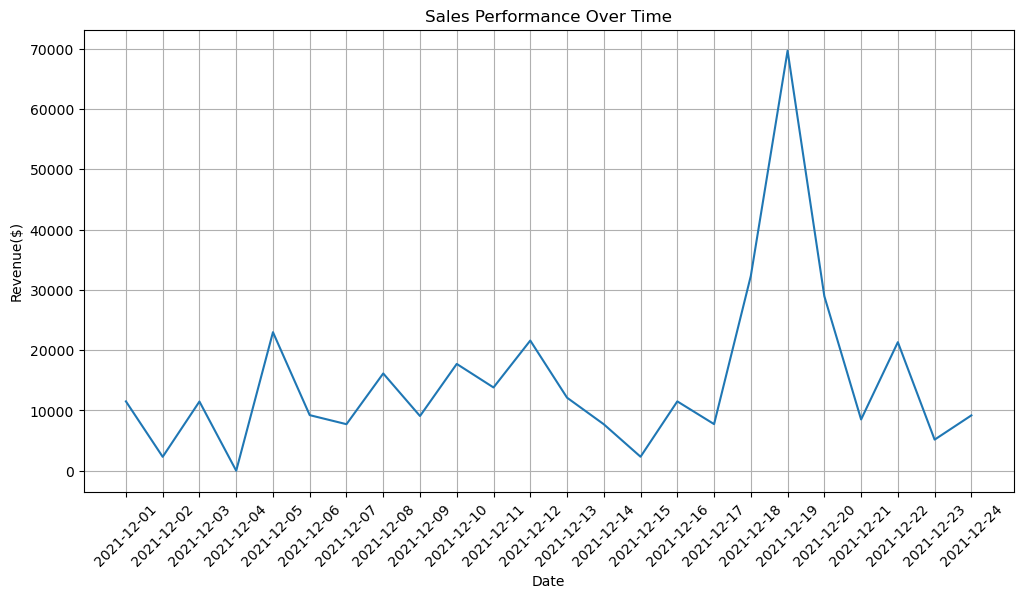

In [41]:
# data is my DataFrame
sales_performance = data.groupby('Date')['Revenue($)'].sum().reset_index()

# Plotting the line chart using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue($)', data=sales_performance)  # Use profit_analysis DataFrame here
plt.title('Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue($)')
plt.xticks(rotation=45)
plt.xticks(sales_performance['Date'].unique())
plt.grid(True)
plt.show()


### Total Order Quantity Over Time

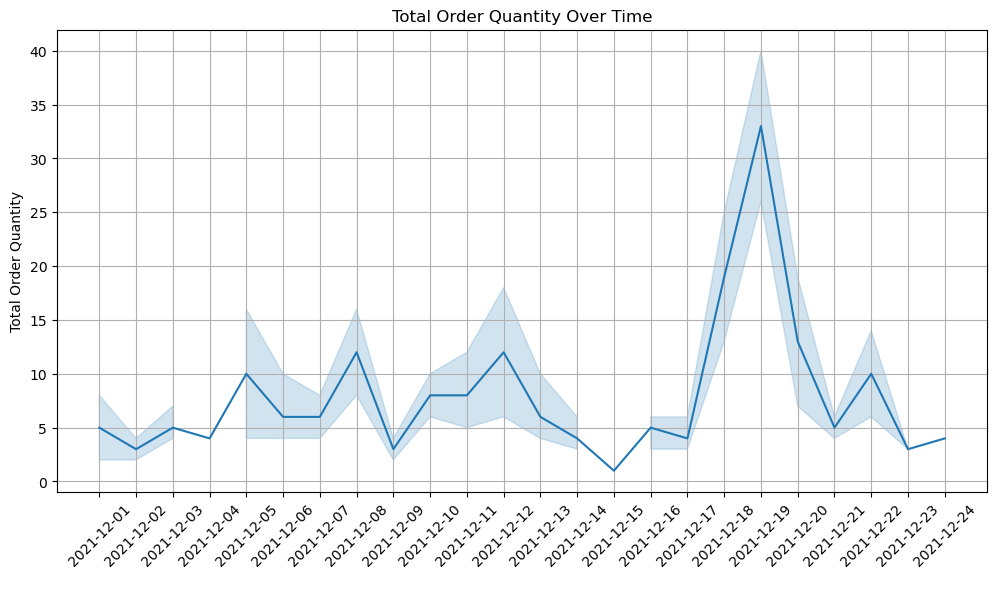

In [42]:
#Total Order Quantity Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Order_Quantity', data=data, estimator=sum)
plt.title('Total Order Quantity Over Time')
plt.xlabel(' ')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.xticks(sales_performance['Date'].unique())
plt.grid(True)
plt.show()

### Customer Age Distribution

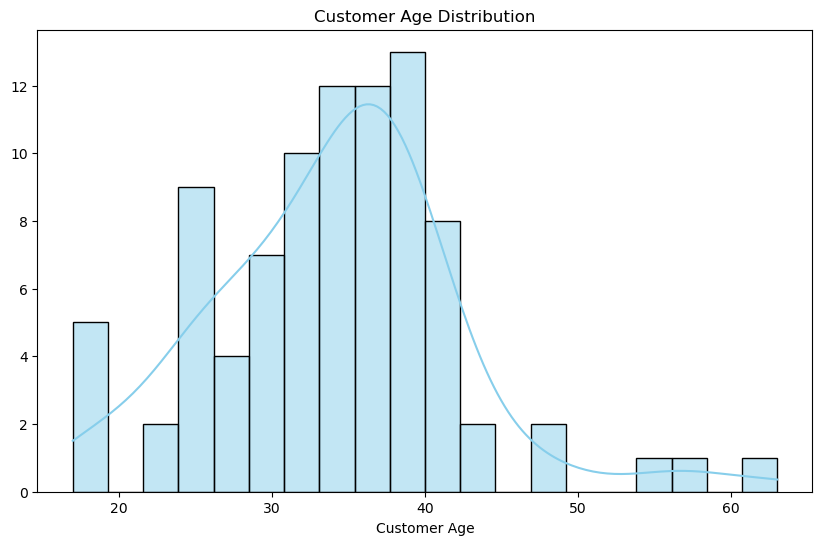

In [43]:
plt.figure(figsize=(10, 6))

# Creating a histogram with KDE (Kernel Density Estimation) for customer age distribution
sns.histplot(x='Customer_Age', data=data, bins=20, kde=True, color='skyblue')

plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('')  # Remove y-axis label

# Removing gridlines
plt.grid(False)

plt.show()

### Popular Bike Colors

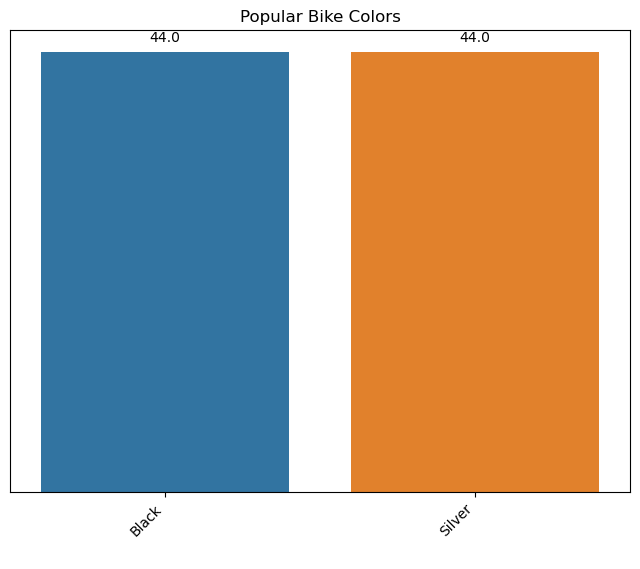

In [44]:
#Popular Bike Colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Bike_Color', data=data)

# Removing gridlines
ax.grid(False)

# Adding y-axis values to the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Popular Bike Colors')
plt.xlabel(' ')
plt.ylabel('')  # Remove y-axis label

# Hiding y-axis
ax.set_yticks([])

plt.xticks(rotation=45, ha='right')
plt.show()

### Correlation between Profit and Cost

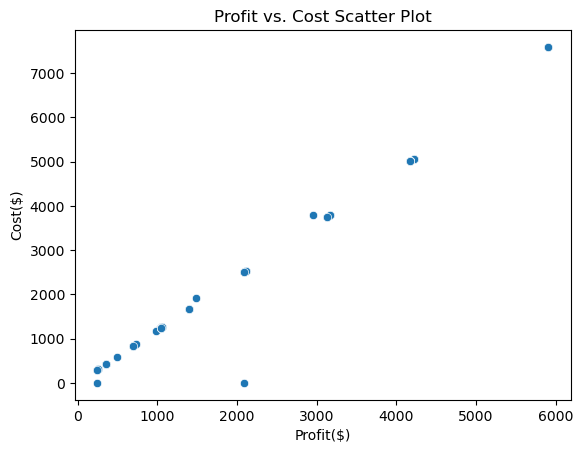

In [45]:
#Profit vs Cost Scatter Plot
sns.scatterplot(x='Profit($)', y='Cost($)', data=data)
plt.title('Profit vs. Cost Scatter Plot')
plt.xlabel('Profit($)')
plt.ylabel('Cost($)')
plt.show()

### Top Selling Models

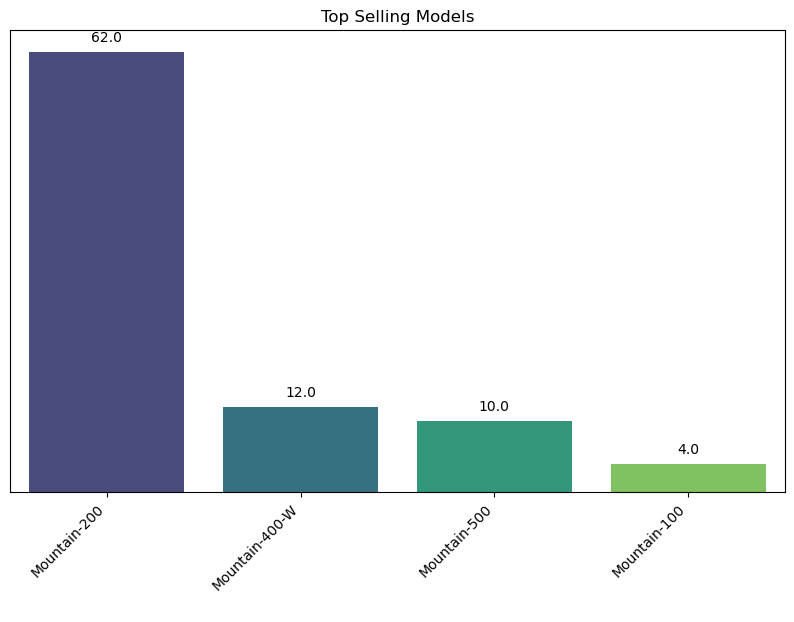

In [46]:
plt.figure(figsize=(10, 6))

# Getting the order of the Model_Name based on counts in descending order
order = data['Model_Name'].value_counts().index

# Creating the countplot with separate colors for each bar and in descending order
ax = sns.countplot(x='Model_Name', data=data, palette='viridis', order=order)

# Adding y-axis values to the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top Selling Models')
plt.xlabel(' ')
plt.ylabel('')  # Remove y-axis label

# Hiding y-axis
ax.set_yticks([])

plt.xticks(rotation=45, ha='right')
plt.show()

### Profit Analysis by Country

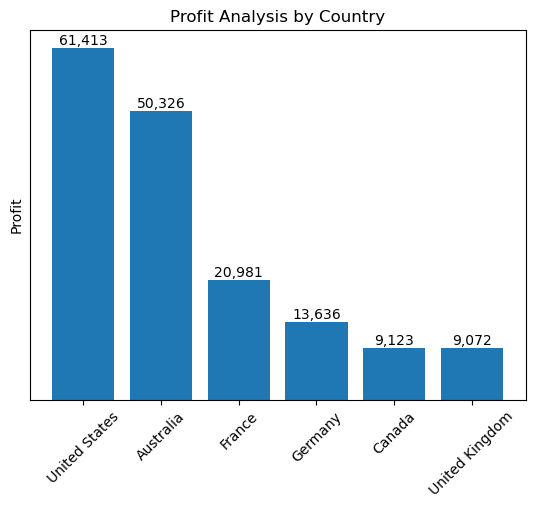

In [47]:
profit_analysis = data.groupby('Country')['Profit($)'].sum().reset_index()

# Sorting the data by profit in descending order
sorted_data = profit_analysis.sort_values(by="Profit($)", ascending=False)

# Plotting the bar chart using the sorted data
plt.bar(sorted_data["Country"], sorted_data["Profit($)"])
plt.title("Profit Analysis by Country")
plt.xlabel(" ")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(False)  # Remove gridlines

# Adding y-axis values on top of the bars
for i, value in enumerate(sorted_data["Profit($)"]):
    plt.text(i, value, f"{value:,}", ha='center', va='bottom')

# Hiding y-axis
plt.yticks([])
plt.show()

# Displaying the total profit
total_profit = sorted_data["Profit($)"].sum()

### Revenue Distribution by Country

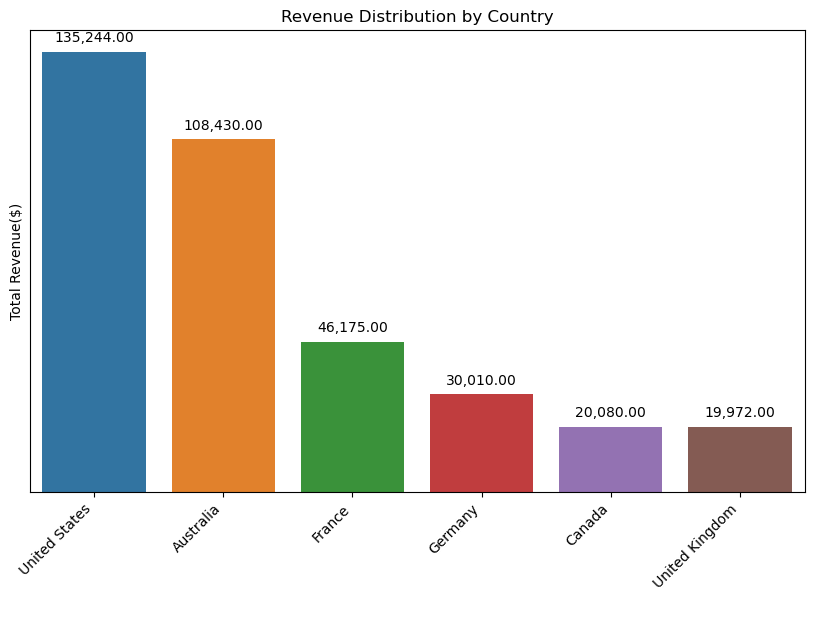

In [48]:
# Grouping the data by 'Country' and calculating the sum of 'Revenue($)' for each group
total_revenue_by_country = data.groupby('Country')['Revenue($)'].sum().reset_index()

# Setting up the plot figure size
plt.figure(figsize=(10, 6))

# Creating a bar plot using Seaborn
ax = sns.barplot(x='Country', y='Revenue($)', data=total_revenue_by_country,
                 estimator=sum, order=total_revenue_by_country.sort_values('Revenue($)', ascending=False)['Country'],
                 errorbar=None)  # Setting ci=None removes error bars

# Turning off the grid
ax.grid(False)

# Annotating each bar with its corresponding total revenue value
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding title and labels to the plot    
plt.title('Revenue Distribution by Country')
plt.xlabel(' ')
plt.ylabel('Total Revenue($)')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')
plt.show()

### Average Order Quantity by Age Group

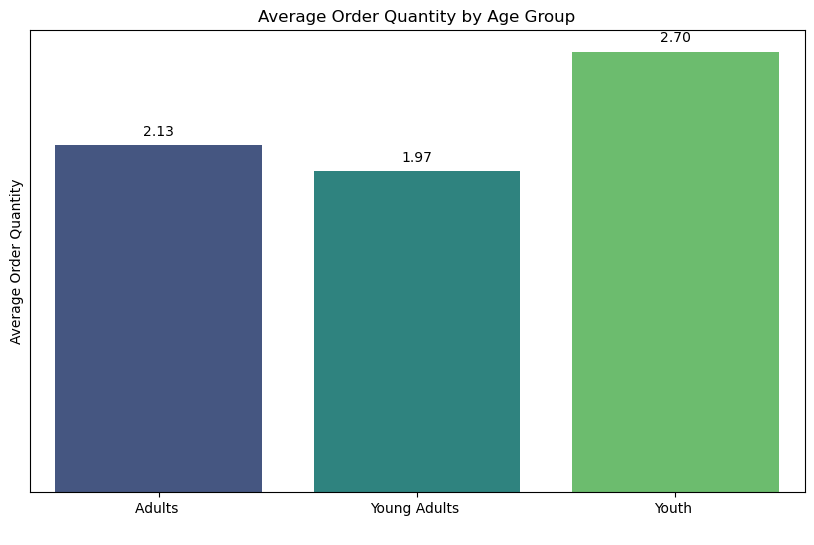

In [49]:
#Average Order Quantity by Age Group
plt.figure(figsize=(10, 6))

# Calculating average order quantity for each age group and sort in descending order
avg_order_quantity = data.groupby('Age_Group')['Order_Quantity'].mean().sort_values(ascending=False).reset_index()

# Creating a bar plot with average order quantity for each age group
ax = sns.barplot(x='Age_Group', y='Order_Quantity', data=avg_order_quantity, errorbar=None, palette='viridis')

# Removing gridlines
ax.grid(False)

# Adding y-axis values to the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Order Quantity by Age Group')
plt.xlabel(' ')
plt.ylabel('Average Order Quantity')

# Removing y-axis
ax.set_yticks([])

plt.show()

### Gender-Based Sales

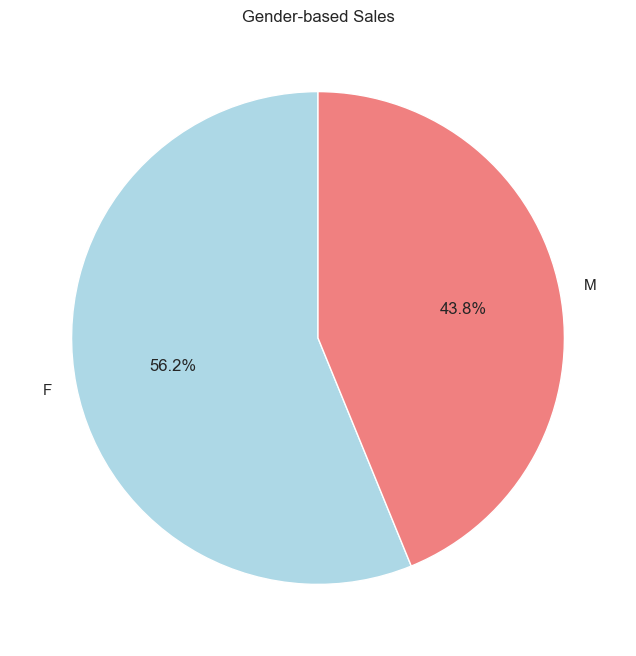

In [50]:
#Gender-based sales
sns.set(style="whitegrid")

# Counting the occurrences of each gender
gender_counts = data['Customer_Gender'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender-based Sales')
plt.show()

## Conclusion

### Sales Analysis:
In examining the bike sales dataset, a discernible pattern emerges in the sales trajectory throughout December. Commencing with a modest start early in the month, sales rapidly escalated in the middle of December. The pinnacle was reached on December 19th, registering a substantial revenue of $69,650. However, sales exhibited a marked downturn, plunging to $28,940 on the 20th, followed by a further decline to $8,498. A notable resurgence occurred on the 22nd, reaching $21,320, only to recede again to $5,155 on the 23rd.

### Demographic Analysis:

A demographic analysis of the dataset manifests a bell-shaped histogram, indicating a concentration of customers within the middle age ranges. The frequency of customers gradually diminishes with age range increments or decrements. The 30-39 age range emerges prominently as the most populated category, surpassing other age groups.
Moreover, a distinctive scarcity of customers is observed in the 0-9 and 50+ age ranges.

### Color Preferences:

The dataset reveals black and silver as the most favored bike colors, each accounting for 44 instances.

### Correlation between Profit and Cost:

A positive correlation between profit and cost is evident, suggesting a general trend of profit increasing with higher costs. However, the correlation is not flawless, as some data points deviate below or above the trend line. Instances exist where establishments achieved lower-than-expected profits for their cost level, alongside cases where profits exceeded expectations.

### Top-Selling Bike Models:

The past year's sales data underscores the popularity of various bike models. The Mountain-200 model stands out as the best-selling, boasting 62 sales, followed by Mountain-400-W with 12 sales and Mountain-500 with 10 sales each. The Mountain-100 model lags behind, with a minimal four sales.

### Profit Distribution by Country:

Analyzing the geographical distribution of profits, the United States emerges as the highest profit-generating region, amassing $61,413. Australia follows closely with a profit of $50,326, trailed by France with $20,981, Germany with $13,636, Canada with $9,123, and the United Kingdom with $9,072.

### Regional Disparities:

Significant disparities in profits become apparent, particularly between the United States and other countries. The U.S. exhibits a profit exceeding twice that of Australia, which holds the second-highest profit among the analyzed countries.




## Recommendations:

Upon a comprehensive analysis of the bike sales dataset, several strategic recommendations emerge:

### Model and Color Focus:
Leverage the popularity of the Mountain-200 model, which significantly outpaces other models with 62 sales. Similarly, capitalize on the preference for black and silver colors, each garnering 44 instances. Tailoring marketing efforts around these preferences can enhance customer engagement and drive sales.

### Seasonal Sales Approach:
Recognizing the distinctive sales patterns observed in December, consider implementing targeted promotions or incentives during peak periods to maximize revenue. A nuanced approach, accounting for the fluctuations identified on specific dates, can optimize sales strategies during the holiday season.

### Demographic Targeting:
Given the bell-shaped demographic distribution, focus marketing efforts on the 30-39 age range, where the customer base is most concentrated. Understanding and aligning with the preferences of this demographic can enhance customer satisfaction and loyalty.

### Profit Optimization:
Acknowledging the positive correlation between profit and cost, delve deeper into the data points deviating from the trend line. Identify factors contributing to instances of lower-than-expected profits for their cost level and explore opportunities to mitigate such discrepancies. Additionally, assess the success factors leading to profits exceeding expectations.

### Global Profit Disparities:
Address the significant profit gap observed between the United States and other countries. Investigate the underlying factors contributing to this discrepancy and formulate targeted strategies to enhance profitability in regions where performance is comparatively lower.

Incorporating these recommendations into the overarching business strategy can foster a more nuanced and data-driven approach to marketing, sales, and profit optimization.